# Chapter 3: Multiple Regression Analysis: Estimation

## 00. Importing all the necessary libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import seaborn as sns

## 01. OLS Fitted Values and Residuals
#### Important Properties of OLS Fitted Values and Residuals:
- The sample average is zero and so $\bar{y} = \bar{\hat{y}}$
- The sample covariance between each independent variable and the OLS residuals is zero. Consequently, the sample covariance between the OLS fitted values and the OLS residuals is zero. 
- The point $(\bar{x}_1, \bar{x}_2, ..., \bar{x}_k, \bar{y})$ is always on the OLS regression line: $\bar{y} = \hat{\beta}_0 + \hat{\beta}_1 \bar{x}_1 + \hat{\beta}_2 \bar{x}_2 + ... + \hat{\beta}_k \bar{x}_k$.

#### 01.1a Why Does the Sum of OLS Residuals Equal Zero When There Is an Intercept?

The sum of OLS residuals being zero when there is an intercept comes directly from the way we derive the OLS estimates using differential calculus.

**1. OLS Minimization and First-Order Condition**

In OLS regression, we estimate the intercept ($\beta_0$) and slope ($\beta_1, \beta_2, \dots$) by minimizing the sum of squared residuals:

$$S = \sum (y_i - \hat{y}_i)^2$$

where residuals are:

$$e_i = y_i - \hat{y}_i$$

To find the optimal $\beta_0$ and $\beta_1$, we take partial derivatives of $S$ and set them to zero:

$$\frac{\partial S}{\partial \beta_0} = -2 \sum e_i = 0$$

which simplifies to:

$$\sum e_i = 0$$

This means the sum of residuals is always zero when an intercept is included in the model.

**2. Intuition: The Intercept Absorbs Systematic Bias**

The intercept acts as a "balancing term" that shifts the regression line up or down to ensure that positive and negative residuals cancel out on average. This ensures the residuals are centered around zero, preventing systematic bias in predictions.

**3. Why Doesn’t This Work Without an Intercept?**

If we force the regression line through the origin ($\beta_0 = 0$), we remove this balancing mechanism. The model can no longer adjust for the mean of $y$, and residuals will no longer sum to zero. This is why we see a large nonzero sum of residuals in the "No Intercept" case in the visualization.

#### 01.2b Why is the Sample Mean of y Equal to the Sample Mean of $ \hat{y} $ in OLS?

In OLS regression, the property that the mean of observed $y$ values ($\bar{y}$) is equal to the mean of predicted values ($\bar{\hat{y}}$) follows directly from the fact that the sum of residuals is zero when an intercept is included.

**1. Start from the Definition of Residuals**

Each residual is defined as:

$$e_i = y_i - \hat{y}_i$$

Taking the sum across all observations:

$$\sum e_i = \sum (y_i - \hat{y}_i)$$

Since we already established that OLS forces the sum of residuals to be zero:

$$\sum (y_i - \hat{y}_i) = 0$$

Rearrange this equation:

$$\sum y_i = \sum \hat{y}_i$$

Dividing by the number of observations ($n$) gives the mean:

$$\frac{1}{n} \sum y_i = \frac{1}{n} \sum \hat{y}_i$$

which simplifies to:

$$\bar{y} = \bar{\hat{y}}$$

**2. Intuition: The Regression Line Balances Around the Mean of y**

The presence of an intercept allows the regression line to pass through the center of the data in an average sense. This means that:

* Some predictions are above $\bar{y}$, and some are below, but on average, $\bar{\hat{y}}$ equals $\bar{y}$.
* The model correctly accounts for the mean of $y$, preventing systematic bias in the fitted values.

**3. What Happens Without an Intercept?**

If we remove the intercept, the regression line is forced through the origin (0, 0), which means it no longer adjusts for the mean of $y$. In this case, there is no guarantee that $\bar{y} = \bar{\hat{y}}$, and they may differ significantly.


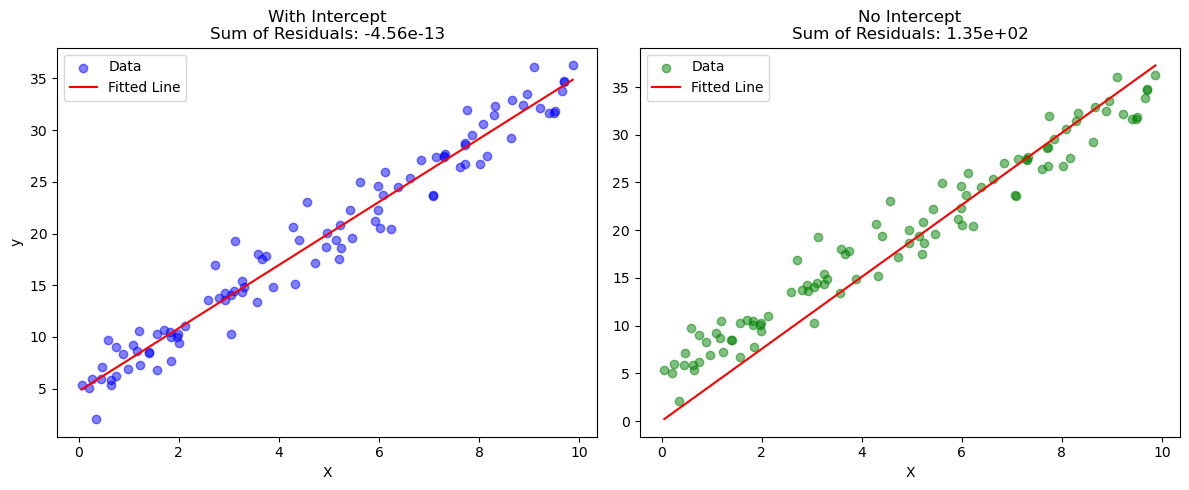

In [4]:
# Generate synthetic data
np.random.seed(42)
X = np.sort(10 * np.random.rand(100, 1), axis=0)
y = 3 * X.squeeze() + 5 + np.random.randn(100) * 2  # True model with noise

# Fit models
model_with_intercept = LinearRegression()
model_no_intercept = LinearRegression(fit_intercept=False)
model_with_intercept.fit(X, y)
model_no_intercept.fit(X, y)

# Predictions
y_pred_intercept = model_with_intercept.predict(X)
y_pred_no_intercept = model_no_intercept.predict(X)

# Residuals
residuals_intercept = y - y_pred_intercept
residuals_no_intercept = y - y_pred_no_intercept

# Sum of residuals
sum_resid_intercept = np.sum(residuals_intercept)
sum_resid_no_intercept = np.sum(residuals_no_intercept)

# Plot
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# With intercept
axes[0].scatter(X, y, label="Data", color='blue', alpha=0.5)
axes[0].plot(X, y_pred_intercept, color='red', label="Fitted Line")
axes[0].set_title(f"With Intercept\nSum of Residuals: {sum_resid_intercept:.2e}")
axes[0].set_xlabel("X")
axes[0].set_ylabel("y")
axes[0].legend()

# Without intercept
axes[1].scatter(X, y, label="Data", color='green', alpha=0.5)
axes[1].plot(X, y_pred_no_intercept, color='red', label="Fitted Line")
axes[1].set_title(f"No Intercept\nSum of Residuals: {sum_resid_no_intercept:.2e}")
axes[1].set_xlabel("X")
axes[1].legend()

plt.tight_layout()
plt.show()

#### 01.2: The Residuals Are Uncorrelated with the Fitted Values

We want to prove that:

$$\text{Cov}(\hat{y}, e) = 0$$

This follows from the derivation of OLS. Let’s go through the detailed steps mathematically.

**Step 1: Covariance Definition**

By definition, the covariance between fitted values ($\hat{y}$) and residuals ($e$) is:

$$\text{Cov}(\hat{y}, e) = \frac{1}{n} \sum (\hat{y}_i - \bar{\hat{y}})(e_i - \bar{e})$$

From Property 1, we already know that the sum of residuals is zero:

$$\bar{e} = \frac{1}{n} \sum e_i = 0$$

So the formula simplifies to:

$$\text{Cov}(\hat{y}, e) = \frac{1}{n} \sum (\hat{y}_i - \bar{\hat{y}}) e_i$$

**Step 3: OLS First-Order Condition**

To minimize the sum of squared residuals, OLS solves:

$$S = \sum e_i^2 = \sum (y_i - \hat{y}_i)^2$$

Taking the derivative with respect to $\beta_0$ (intercept):

$$\frac{\partial S}{\partial \beta_0} = -2 \sum e_i = 0$$

which gives us:

$$\sum e_i = 0$$

Since fitted values $\hat{y}_i$ are linear combinations of the explanatory variables $x_1, x_2, ..., x_k$, we can express them as:

$$\hat{y}_i = \beta_0 + \beta_1 x_{1i} + \beta_2 x_{2i} + \dots + \beta_k x_{ki}$$

OLS minimizes the sum of squared residuals $\sum e_i^2$. Taking derivatives with respect to each coefficient $\beta_j$ gives the first-order conditions:

$$\sum x_{ji} e_i = 0 \quad \text{for each } j = 0, 1, ..., k$$

Since $\hat{y}_i$ is a linear combination of $x_{ji}$, it follows that:

$$\sum \hat{y}_i e_i = 0$$

which directly simplifies our covariance formula:

$$\text{Cov}(\hat{y}, e) = \frac{1}{n} \sum (\hat{y}_i - \bar{\hat{y}}) e_i = 0$$

#### 01.3: The Point $(\bar{x}_1, \bar{x}_2, ..., \bar{x}_k, \bar{y})$ is Always on the OLS Regression Line

This means that the regression line always passes through the mean of the explanatory variables and the mean of the dependent variable. Mathematically:

$$\bar{y} = \hat{\beta}_0 + \hat{\beta}_1 \bar{x}_1 + \hat{\beta}_2 \bar{x}_2 + \dots + \hat{\beta}_k \bar{x}_k$$

Why is this true?

Start from the OLS regression equation:

$$y_i = \hat{\beta}_0 + \hat{\beta}_1 x_{1i} + \hat{\beta}_2 x_{2i} + \dots + \hat{\beta}_k x_{ki} + e_i$$

Take the mean on both sides:

$$\frac{1}{n} \sum y_i = \hat{\beta}_0 + \hat{\beta}_1 \frac{1}{n} \sum x_{1i} + \hat{\beta}_2 \frac{1}{n} \sum x_{2i} + \dots + \hat{\beta}_k \frac{1}{n} \sum x_{ki} + \frac{1}{n} \sum e_i$$

Use Property 1 ($\sum e_i = 0$):

Since the sum of residuals is zero, we get:

$$\bar{y} = \hat{\beta}_0 + \hat{\beta}_1 \bar{x}_1 + \hat{\beta}_2 \bar{x}_2 + \dots + \hat{\beta}_k \bar{x}_k$$

#### 01.3: Intuition Behind This Property

The regression line is fitted to minimize errors, and a well-fitted line balances residuals around zero.

Because of this balance, the mean of $y$ (actual outcomes) must align with the mean of $\hat{y}$ (fitted values).

Since $\hat{y}$ is derived from the regression equation, the point $(\bar{x}_1, ..., \bar{x}_k, \bar{y})$ must always lie on the estimated regression plane.

## 02. Deriving the Relationship Between $\tilde{\beta}_1$ and $\hat{\beta}_1$

We are given the auxiliary regression:

$$x_2 = \tilde{\delta}_0 + \tilde{\delta}_1 x_1 + v$$

where $x_2$ is regressed on $x_1$, meaning $\tilde{\delta}_1$ captures the relationship between these two explanatory variables.

Our goal is to show:

$$\tilde{\beta}_1 = \hat{\beta}_1 + \tilde{\delta}_1 \hat{\beta}_2$$

which expresses the relationship between simple regression and multiple regression coefficients.

**Step 1: Simple and Multiple Regression Definitions**

* **Simple Regression ($\tilde{\beta}_1$)**

    If we regress $y$ on just $x_1$, the coefficient is:

    $$\tilde{\beta}_1 = \frac{\text{Cov}(y, x_1)}{\text{Var}(x_1)}$$

* **Multiple Regression ($\hat{\beta}_1, \hat{\beta}_2$)**

    In a multiple regression of $y$ on both $x_1$ and $x_2$:

    $$y = \hat{\beta}_0 + \hat{\beta}_1 x_1 + \hat{\beta}_2 x_2 + e$$

    The OLS estimate of $\hat{\beta}_1$ accounts for the presence of $x_2$.

**Step 2: Substituting $x_2$ from the Auxiliary Regression**

From the auxiliary regression:

$$x_2 = \tilde{\delta}_0 + \tilde{\delta}_1 x_1 + v$$

we substitute this into the multiple regression equation:

$$y = \hat{\beta}_0 + \hat{\beta}_1 x_1 + \hat{\beta}_2 (\tilde{\delta}_0 + \tilde{\delta}_1 x_1 + v) + e$$

Expanding:

$$y = \hat{\beta}_0 + \hat{\beta}_1 x_1 + \hat{\beta}_2 \tilde{\delta}_0 + \hat{\beta}_2 \tilde{\delta}_1 x_1 + \hat{\beta}_2 v + e$$

Rearranging:

$$y = (\hat{\beta}_0 + \hat{\beta}_2 \tilde{\delta}_0) + (\hat{\beta}_1 + \hat{\beta}_2 \tilde{\delta}_1)x_1 + (\hat{\beta}_2 v + e)$$

Comparing with the simple regression form:

$$y = \tilde{\beta}_0 + \tilde{\beta}_1 x_1 + \text{error}$$

we identify:

$$\tilde{\beta}_1 = \hat{\beta}_1 + \tilde{\delta}_1 \hat{\beta}_2$$

which is exactly what we set out to prove.

**Intuition Behind This Result**

* $\hat{\beta}_1$ is the coefficient of $x_1$ when $x_2$ is included in the model.
* $\tilde{\beta}_1$ is the coefficient of $x_1$ when $x_2$ is omitted.
* When $x_2$ is omitted, its effect "spills over" into $x_1$, scaled by $\tilde{\delta}_1$.
* This means $\tilde{\beta}_1$ in the simple regression "absorbs" part of $\hat{\beta}_2$, weighted by how strongly $x_1$ and $x_2$ are related ($\tilde{\delta}_1$).

## 03. Understanding the omitted variable bias

In [8]:
from sklearn.datasets import fetch_california_housing

# Load California housing dataset
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['MedHouseVal'] = data.target

# Take a smaller sample for clarity
df_sample = df.sample(n=500, random_state=42)

# Full Model: MedHouseVal ~ AveRooms + MedInc
X_full = sm.add_constant(df_sample[['AveRooms', 'MedInc']])
y = df_sample['MedHouseVal']
model_full = sm.OLS(y, X_full).fit()
beta1_full = model_full.params['AveRooms']

# Underspecified Model: MedHouseVal ~ AveRooms
X_under = sm.add_constant(df_sample[['AveRooms']])
model_under = sm.OLS(y, X_under).fit()
beta1_under = model_under.params['AveRooms']

# Compare Coefficients in Table
summary_df = pd.DataFrame({
    'Model': ['Full Model', 'Underspecified Model'],
    'Beta_1_hat (AveRooms)': [beta1_full, beta1_under]
})

print(summary_df.to_string(index=False))


               Model  Beta_1_hat (AveRooms)
          Full Model              -0.042336
Underspecified Model               0.158812
